In [1]:
import sys
sys.path.insert(0, '../utils')

from dataPiping import *

import numpy as np
import pandas as pd

import math

import datetime

from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error
from math import exp, fabs, sqrt, log, pi
import random

In [4]:
from scipy import stats

In [12]:
X, y = readAggrData()

In [13]:
del X['recency']

In [14]:
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

(array([  4.43760000e+04,   9.24000000e+02,   1.83000000e+02,
          5.40000000e+01,   1.40000000e+01,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.87900000e+02,   3.74800000e+02,
          5.61700000e+02,   7.48600000e+02,   9.35500000e+02,
          1.12240000e+03,   1.30930000e+03,   1.49620000e+03,
          1.68310000e+03,   1.87000000e+03]),
 <a list of 10 Patch objects>)

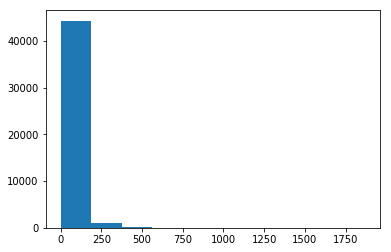

In [6]:
plt.hist(X.nSessions)

## Linear Regression Model

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
rmse = sqrt(mean_squared_error(y_test, lr.predict(X_test)))

In [18]:
rmse

7750008.69013994

In [19]:
str(datetime.timedelta(seconds=rmse))

'89 days, 16:46:48.690140'

In [20]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_train, lr.predict(X_train)))))

'89 days, 10:59:36.326811'

In [13]:
def pltBars(values, labels):
    fig = plt.figure(figsize=(20,5))
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)

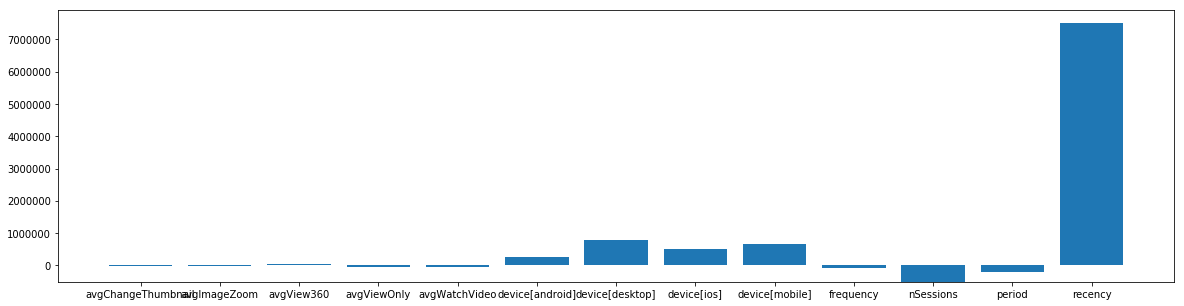

In [14]:
pltBars(lr.coef_, X.columns)

(array([  8.00000000e+00,   3.18000000e+02,   8.27200000e+03,
          3.16300000e+03,   1.23500000e+03,   6.99000000e+02,
          4.80000000e+02,   3.86000000e+02,   3.04000000e+02,
          1.69000000e+02]),
 array([ -8976587.74951801,  -4129251.42089989,    718084.90771823,
          5565421.23633635,  10412757.56495447,  15260093.89357259,
         20107430.2221907 ,  24954766.55080883,  29802102.87942695,
         34649439.20804507,  39496775.53666318]),
 <a list of 10 Patch objects>)

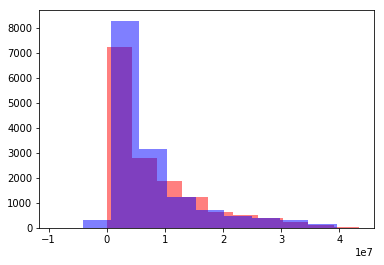

In [15]:
y_pred = lr.predict(X_test)
plt.hist(y_test, alpha=0.5, color='r')
plt.hist(y_pred, alpha=.5, color='b')

(array([  153.,   453.,   722.,  1001.,  1412.,  2336.,  5675.,  2885.,
          311.,    86.]),
 array([-10913822.65570588,  -9039264.45203579,  -7164706.2483657 ,
         -5290148.04469561,  -3415589.84102552,  -1541031.63735543,
           333526.56631467,   2208084.76998476,   4082642.97365485,
          5957201.17732494,   7831759.38099503]),
 <a list of 10 Patch objects>)

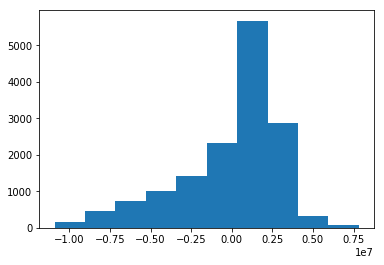

In [16]:
plt.hist(y_pred - y_test)

## Avg Predictor

In [17]:
rmse_avg = sqrt(mean_squared_error(y_test, [np.average(y_train)]*len(y_test)))
# rmse_avg = sqrt(mean_squared_error(y_train, [np.average(y_train)]*len(y_train)))
str(datetime.timedelta(seconds=rmse_avg))

'96 days, 3:45:01.018388'

In [18]:
rmse_avg

8307901.018387657

In [19]:
stats.mode(y_train)

ModeResult(mode=array([ 178731.]), count=array([2]))

(array([     0.,      0.,      0.,      0.,      0.,  15034.,      0.,
             0.,      0.,      0.]),
 array([ 7727117.60179324,  7727117.70179324,  7727117.80179324,
         7727117.90179324,  7727118.00179324,  7727118.10179324,
         7727118.20179324,  7727118.30179324,  7727118.40179324,
         7727118.50179324,  7727118.60179324]),
 <a list of 10 Patch objects>)

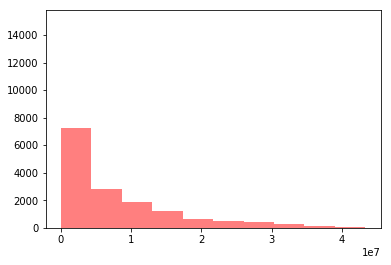

In [20]:
y_pred = [np.average(y_train)]*len(y_test)
plt.hist(y_test, alpha=0.5, color='r')
plt.hist(y_pred, alpha=.5, color='b')

(array([   35.,   113.,   243.,   407.,   499.,   648.,  1219.,  1863.,
         2785.,  7222.]),
 array([-35616813.89820676, -31282906.77987335, -26948999.66153994,
        -22615092.54320653, -18281185.42487312, -13947278.30653971,
         -9613371.18820629,  -5279464.06987288,   -945556.95153947,
          3388350.16679394,   7722257.28512735]),
 <a list of 10 Patch objects>)

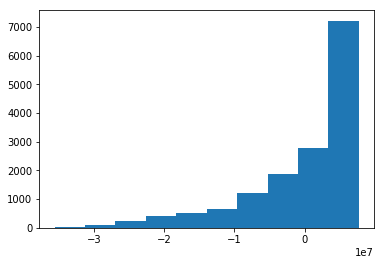

In [21]:
plt.hist(y_pred - y_test)